## FULL SEQUENCES FOR MOBILOME

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


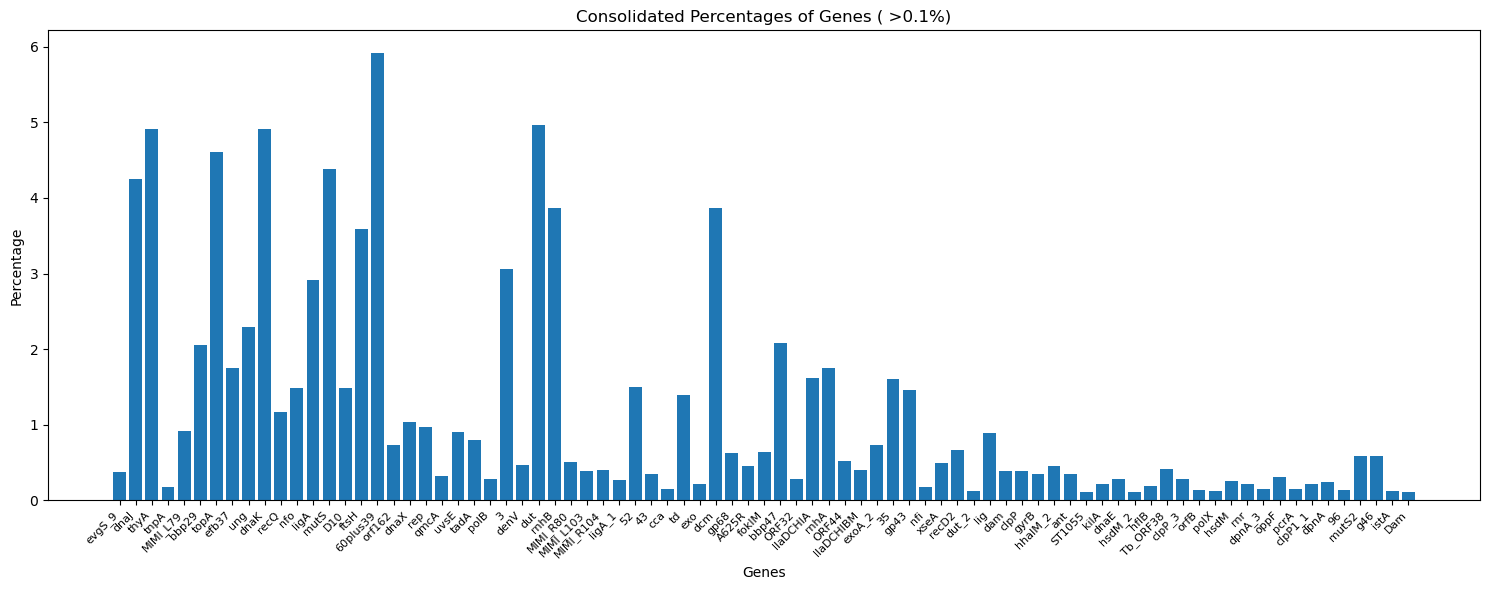

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_porcentaje_consolidado_genes(csv_file, columna_genes='Gene Name', keywords=None, porcentaje_minimo=0.1):
    """
    Calcula el porcentaje consolidado de aparición de cada gen en la columna especificada de un archivo CSV,
    ignorando los valores NaN. Guarda los porcentajes en un CSV y genera un gráfico de barras para visualizar los datos.
    
    Parámetros:
    - csv_file (str): Ruta al archivo CSV que contiene los datos.
    - columna_genes (str): Nombre de la columna que contiene los nombres de genes a analizar.
    - keywords (list): Lista de palabras clave para filtrar basándose en otra columna del CSV (opcional).
    - porcentaje_minimo (float): El porcentaje mínimo para incluir un gen en el gráfico.
    """
    
    # Cargar el DataFrame desde el archivo CSV
    df = pd.read_csv(csv_file)
    
    # Filtrar el DataFrame según palabras clave si es necesario
    if keywords:
        pattern = '|'.join(keywords)
        df = df[df['specie'].str.contains(pattern, case=False, na=False)]  # Ajusta 'specie' si necesitas otra columna
    
    # Calcular el porcentaje consolidado de los genes en la columna especificada
    genes_consolidados = {}
    for celda in df[columna_genes]:
        if pd.isna(celda):
            continue
        genes = str(celda).split(',')
        for gen in genes:
            if gen.strip() and gen.lower().strip() != 'nan':
                genes_consolidados[gen] = genes_consolidados.get(gen, 0) + 1
    
    # Calcular el total de genes
    total_genes = sum([len(str(celda).split(',')) for celda in df[columna_genes].dropna()])
    
    # Convertir las frecuencias a porcentajes
    for gen, frecuencia in genes_consolidados.items():
        genes_consolidados[gen] = (frecuencia / total_genes) * 100
    
    # Guardar los porcentajes en un archivo CSV
    (pd.DataFrame.from_dict(genes_consolidados, orient='index', columns=['Percentage'])
       .to_csv('Percentage_consolidated_genes.csv'))
    
    # Filtrar los genes con un porcentaje superior al mínimo
    genes_consolidados_filtrado = {gen: porcentaje for gen, porcentaje in genes_consolidados.items() if porcentaje >= porcentaje_minimo}
    
    # Gráfico de Barras
    plt.figure(figsize=(15, 6))  # Aumentar el tamaño del gráfico
    plt.bar(genes_consolidados_filtrado.keys(), genes_consolidados_filtrado.values())
    plt.title(f'Consolidated Percentages of Genes ( >{porcentaje_minimo}%)')
    plt.xlabel('Genes')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Disminuir el tamaño de la fuente
    plt.tight_layout()
    plt.savefig('bar_chart_consolidated_genes.png')
    plt.show()

# Uso de la función
csv_file = 'All_NCLDVs.fna.mobileOG.Alignment.Out.csv'
calcular_porcentaje_consolidado_genes(csv_file, columna_genes='Gene Name', porcentaje_minimo=0.1)


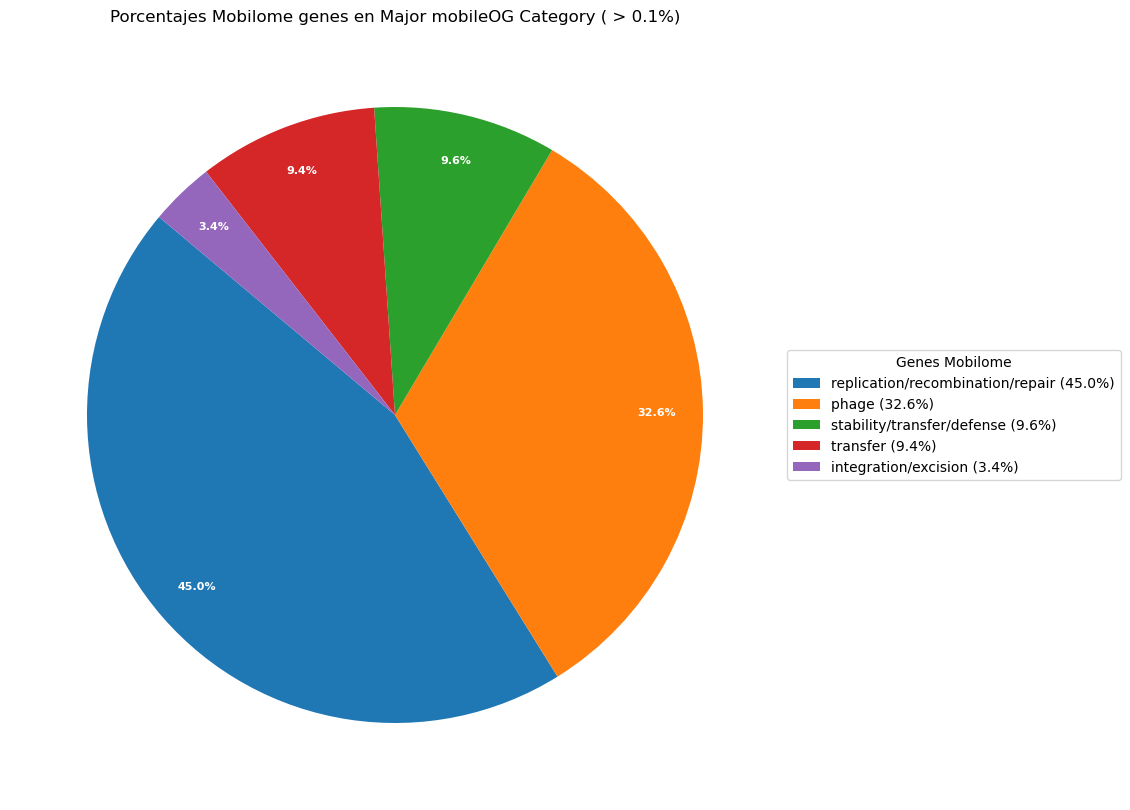

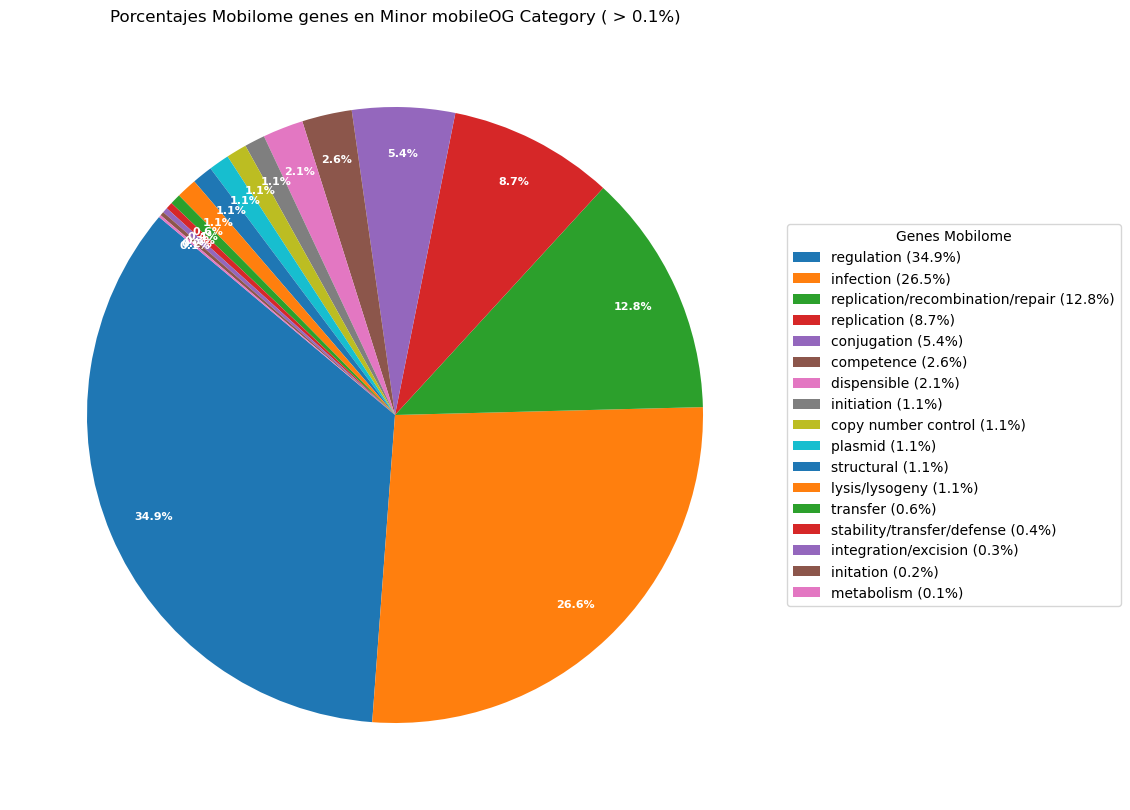

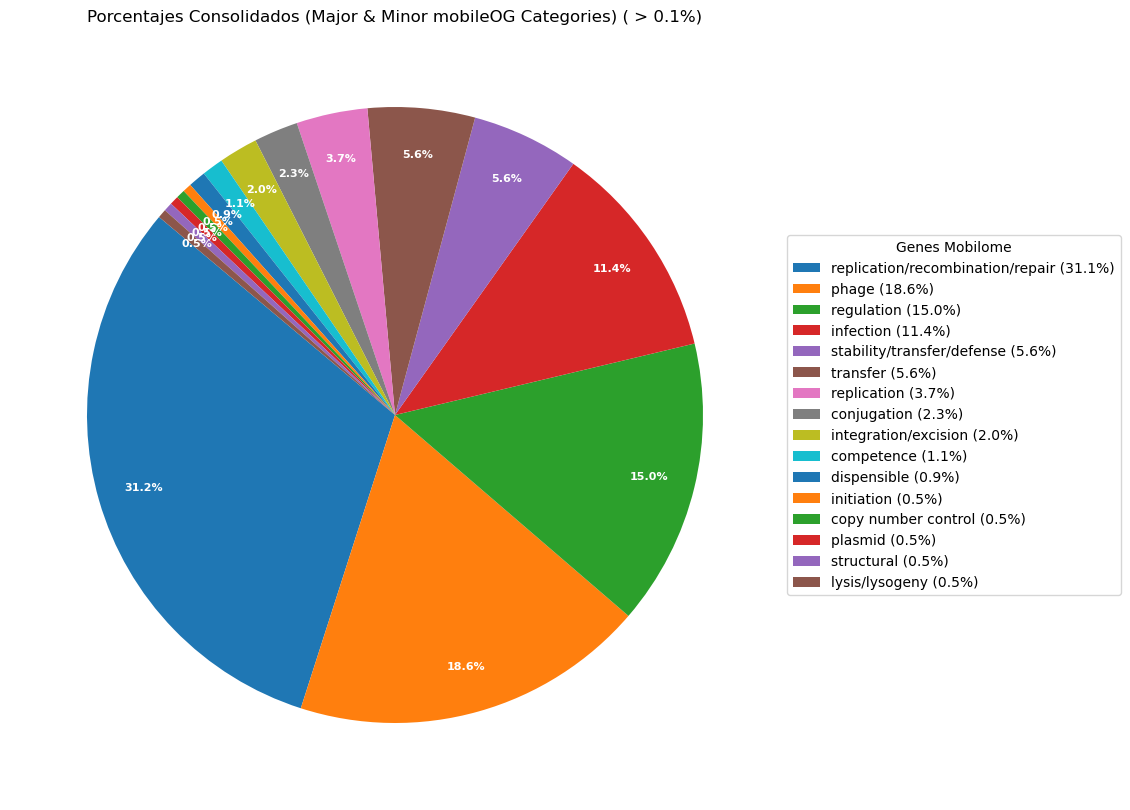

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_porcentajes_y_graficar_mobilome(csv_filename, keywords=None, porcentaje_minimo=0.1):
    """
    Calcula y grafica los porcentajes de IDs en las columnas 'Major mobileOG Category' y 'Minor mobileOG Category',
    ignorando los NaN. También realiza un consolidado de los valores de ambas columnas y permite filtrar los valores
    por un porcentaje mínimo.

    Parámetros:
    - csv_filename (str): Nombre del archivo CSV a analizar.
    - keywords (list of str, opcional): Lista de palabras clave para filtrar la columna 'specie'. 
      Si se omite o es None, no se realiza ningún filtrado.
    - porcentaje_minimo (float, opcional): Porcentaje mínimo para incluir un ID en los gráficos. El valor por defecto es 0.
    """
    # Leer el CSV y convertirlo en DataFrame
    df = pd.read_csv(csv_filename)
    
    # Si hay palabras clave especificadas, filtrar el DataFrame
    if keywords:
        pattern = '|'.join(keywords)
        df = df[df['specie'].str.contains(pattern, case=False, na=False)]
    
    # Definir las columnas a analizar
    columnas = ['Major mobileOG Category', 'Minor mobileOG Category']
    
    for columna in columnas:
        ids = []
        for val in df[columna].dropna():
            ids.extend([x.strip() for x in val.split(',') if x.lower().strip() != 'nan'])
        
        ids_series = pd.Series(ids)
        conteo_ids = ids_series.value_counts()
        porcentajes = (conteo_ids / len(ids_series)) * 100
        
        # Filtrar por el porcentaje mínimo
        porcentajes_filtrados = porcentajes[porcentajes >= porcentaje_minimo]
        
        # Guardar porcentajes filtrados en CSV
        porcentajes_filtrados.to_csv(f'percentages_{columna}_filtered.csv')
        
        # Crear gráfico de torta solo con los valores filtrados
        if not porcentajes_filtrados.empty:
            fig, ax = plt.subplots(figsize=(10, 10))
            wedges, texts, autotexts = ax.pie(porcentajes_filtrados, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops=dict(color="w"))
            ax.legend(wedges, [f"{i} ({j:1.1f}%)" for i, j in zip(porcentajes_filtrados.index, porcentajes_filtrados)], title="Genes Mobilome", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            plt.setp(autotexts, size=8, weight="bold")
            plt.title(f'Porcentajes Mobilome genes en {columna} ( > {porcentaje_minimo}%)')
            plt.savefig(f'pie_chart_{columna}_filtered.png', bbox_inches="tight")
            plt.show()
    
    # Consolidado de 'Major mobileOG Category' y 'Minor mobileOG Category'
    ids_consolidados = []
    for columna in columnas:
        for val in df[columna].dropna():
            ids_consolidados.extend([x.strip() for x in val.split(',') if x.lower().strip() != 'nan'])
    
    ids_series_consolidados = pd.Series(ids_consolidados)
    conteo_ids_consolidados = ids_series_consolidados.value_counts()
    porcentajes_consolidados = (conteo_ids_consolidados / len(ids_series_consolidados)) * 100
    
    # Filtrar porcentajes consolidados por el porcentaje mínimo
    porcentajes_consolidados_filtrados = porcentajes_consolidados[porcentajes_consolidados >= porcentaje_minimo]
    
    # Guardar porcentajes consolidados filtrados en CSV
    porcentajes_consolidados_filtrados.to_csv('consolidated_percentages_Major_Minor_mobileOG_Categories_filtered.csv')
    
    # Crear gráfico de torta consolidado solo con los valores filtrados
    if not porcentajes_consolidados_filtrados.empty:
        fig, ax = plt.subplots(figsize=(10, 10))
        wedges, texts, autotexts = ax.pie(porcentajes_consolidados_filtrados, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops=dict(color="w"))
        ax.legend(wedges, [f"{i} ({j:1.1f}%)" for i, j in zip(porcentajes_consolidados_filtrados.index, porcentajes_consolidados_filtrados)], title="Genes Mobilome", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=8, weight="bold")
        plt.title(f'Porcentajes Consolidados (Major & Minor mobileOG Categories) ( > {porcentaje_minimo}%)')
        plt.savefig('pie_chart_consolidated_Major_Minor_mobileOG_Categories_filtered.png', bbox_inches="tight")
        plt.show()

# Ejemplo de uso con un porcentaje mínimo
keywords = []  # O puedes especificar algunas palabras clave si es necesario
calcular_porcentajes_y_graficar_mobilome('All_NCLDVs.fna.mobileOG.Alignment.Out.csv', keywords=keywords, porcentaje_minimo=0.1)


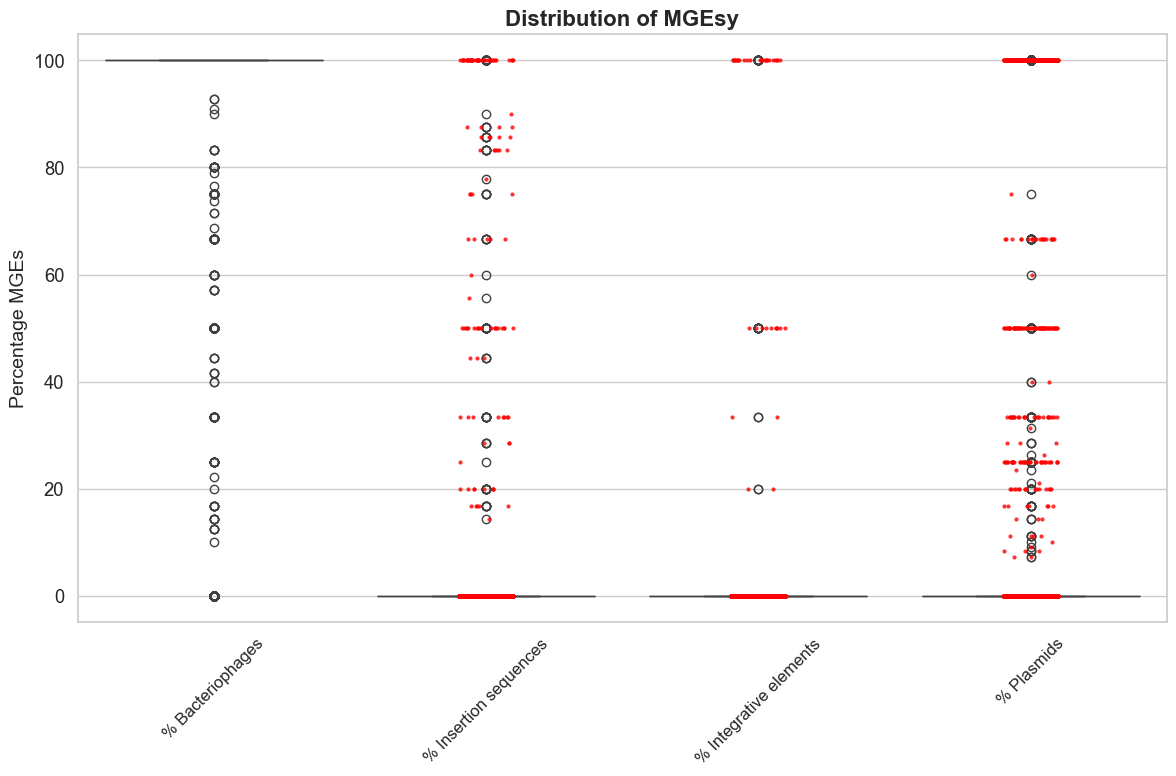

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo CSV para revisar su contenido
file_path = 'All_NCLDVs.fna.summary.csv'
df = pd.read_csv(file_path)

# Calcular los porcentajes a partir de las columnas Bacteriophages, Insertion sequences, Integrative elements y Plasmids
df['Total Elements'] = df[['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids']].sum(axis=1)

# Evitar la división por 0
df['Total Elements'] = df['Total Elements'].replace(0, 1)

# Cálculo de los porcentajes
df['% Bacteriophages'] = (df['Bacteriophages'] / df['Total Elements']) * 100
df['% Insertion sequences'] = (df['Insertion sequences'] / df['Total Elements']) * 100
df['% Integrative elements'] = (df['Integrative elements'] / df['Total Elements']) * 100
df['% Plasmids'] = (df['Plasmids'] / df['Total Elements']) * 100

# Guardar los resultados en un nuevo CSV
output_file_path = 'percentage_analysis_results.csv'
df.to_csv(output_file_path, index=False)

# Configurar estilo de gráfico para alta calidad
sns.set(style="whitegrid", font_scale=1.2)

# Graficar los resultados con una paleta de colores vibrante y guardar en PNG
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['% Bacteriophages', '% Insertion sequences', '% Integrative elements', '% Plasmids']], 
            palette="husl")  # Cambiar a una paleta de colores vibrante

# Añadir los puntos donde el porcentaje es igual a 0 en rojo
for col in ['% Insertion sequences', '% Integrative elements', '% Plasmids']:
    sns.stripplot(data=df[[col]], color='red', jitter=True, size=3, marker='o', alpha=0.8)

# Ajustes de título y etiquetas
plt.title("Distribution of MGEsy", fontsize=16, fontweight='bold')
plt.ylabel("Percentage MGEs", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Guardar el gráfico como un archivo PNG para mantener los colores
output_image_path = 'Distribution_of_MGEs_colored.png'
plt.savefig(output_image_path, dpi=300)

# Mostrar el gráfico
plt.show()


ANÁLISIS ESTADÍSTICO DE ELEMENTOS GENÉTICOS MÓVILES (MGEs)

1. FRECUENCIAS ABSOLUTAS (Número de MGEs por tipo)
            MGE Type  Suma Total  Media por Muestra  Desviación Estándar  Mínimo  Máximo
      Bacteriophages      3383.0           1.205201             1.386706     0.0    20.0
 Insertion sequences       311.0           0.110794             0.793897     0.0    18.0
Integrative elements        41.0           0.014606             0.122926     0.0     2.0
            Plasmids       683.0           0.243320             0.592424     0.0     8.0
               TOTAL      4418.0           1.591022             1.833257     1.0    28.0

2. PROPORCIONES Y PORCENTAJES (Distribución relativa de MGEs)
            MGE Type  Conteo Total  Proporción  Porcentaje (%)
      Bacteriophages        3383.0      0.7657           76.57
 Insertion sequences         311.0      0.0704            7.04
Integrative elements          41.0      0.0093            0.93
            Plasmids         683.0      

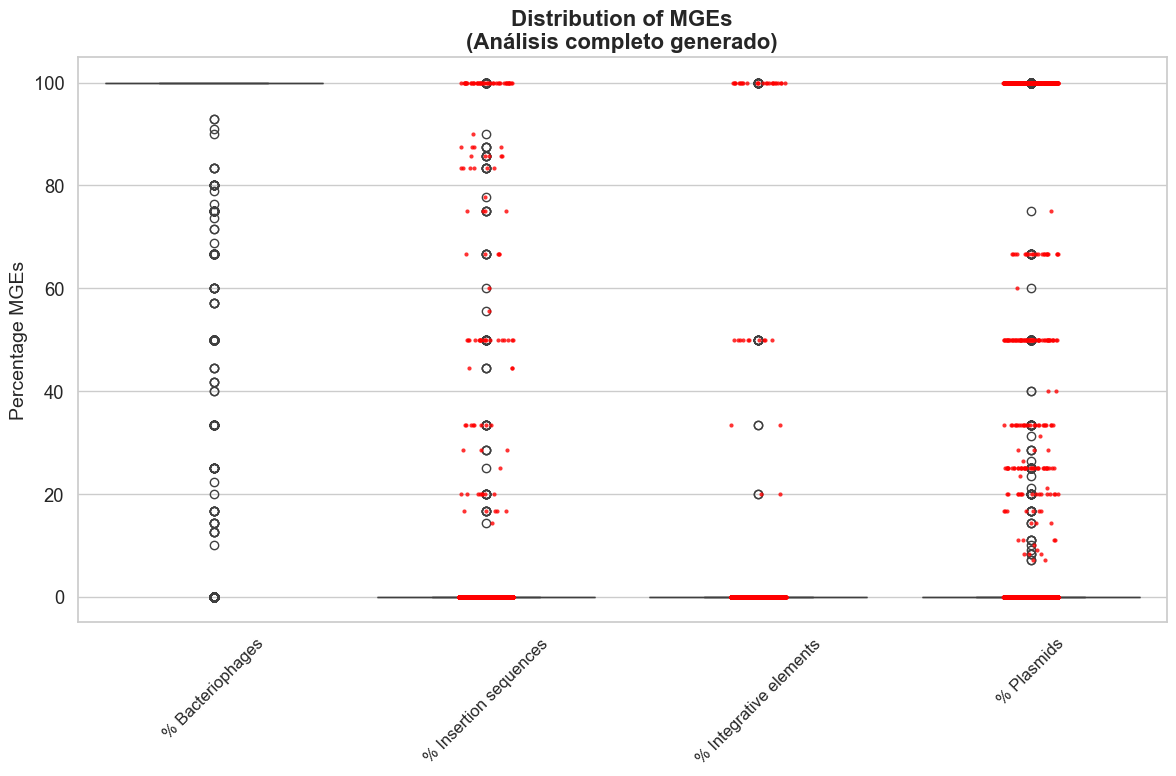


RESUMEN EJECUTIVO

Total de muestras analizadas: 2807
Total de MGEs identificados: 4,418.0

MGE más abundante: Bacteriophages
  - Conteo: 3,383.0
  - Porcentaje: 76.57%

MGE más frecuente (mayor presencia): Bacteriophages
  - Presente en el 84.54% de las muestras

ARCHIVOS GENERADOS:
1. percentage_analysis_results.csv - Datos completos con porcentajes
2. frecuencias_absolutas_MGEs.csv - Frecuencias absolutas
3. proporciones_MGEs.csv - Proporciones y porcentajes globales
4. estadisticas_porcentajes_MGEs.csv - Estadísticas descriptivas
5. analisis_presencia_MGEs.csv - Análisis de presencia/ausencia
6. matriz_correlacion_MGEs.csv - Matriz de correlación
7. Distribution_of_MGEs_colored.png - Gráfico de distribución

¡Análisis completado exitosamente!


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Cargar el archivo CSV
file_path = 'All_NCLDVs.fna.summary.csv'
df = pd.read_csv(file_path)

# Calcular los porcentajes
df['Total Elements'] = df[['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids']].sum(axis=1)
df['Total Elements'] = df['Total Elements'].replace(0, 1)

# Cálculo de los porcentajes
df['% Bacteriophages'] = (df['Bacteriophages'] / df['Total Elements']) * 100
df['% Insertion sequences'] = (df['Insertion sequences'] / df['Total Elements']) * 100
df['% Integrative elements'] = (df['Integrative elements'] / df['Total Elements']) * 100
df['% Plasmids'] = (df['Plasmids'] / df['Total Elements']) * 100

# Guardar resultados en CSV
output_file_path = 'percentage_analysis_results.csv'
df.to_csv(output_file_path, index=False)

# ============================================================================
# ANÁLISIS ESTADÍSTICO DETALLADO
# ============================================================================

print("=" * 80)
print("ANÁLISIS ESTADÍSTICO DE ELEMENTOS GENÉTICOS MÓVILES (MGEs)")
print("=" * 80)

# 1. FRECUENCIAS ABSOLUTAS (conteos)
print("\n" + "=" * 80)
print("1. FRECUENCIAS ABSOLUTAS (Número de MGEs por tipo)")
print("=" * 80)

freq_absolutas = pd.DataFrame({
    'MGE Type': ['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids', 'TOTAL'],
    'Suma Total': [
        df['Bacteriophages'].sum(),
        df['Insertion sequences'].sum(),
        df['Integrative elements'].sum(),
        df['Plasmids'].sum(),
        df[['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids']].sum().sum()
    ],
    'Media por Muestra': [
        df['Bacteriophages'].mean(),
        df['Insertion sequences'].mean(),
        df['Integrative elements'].mean(),
        df['Plasmids'].mean(),
        df['Total Elements'].mean()
    ],
    'Desviación Estándar': [
        df['Bacteriophages'].std(),
        df['Insertion sequences'].std(),
        df['Integrative elements'].std(),
        df['Plasmids'].std(),
        df['Total Elements'].std()
    ],
    'Mínimo': [
        df['Bacteriophages'].min(),
        df['Insertion sequences'].min(),
        df['Integrative elements'].min(),
        df['Plasmids'].min(),
        df['Total Elements'].min()
    ],
    'Máximo': [
        df['Bacteriophages'].max(),
        df['Insertion sequences'].max(),
        df['Integrative elements'].max(),
        df['Plasmids'].max(),
        df['Total Elements'].max()
    ]
})

print(freq_absolutas.to_string(index=False))

# Guardar frecuencias absolutas
freq_absolutas.to_csv('frecuencias_absolutas_MGEs.csv', index=False)

# 2. PROPORCIONES Y PORCENTAJES (distribución relativa)
print("\n" + "=" * 80)
print("2. PROPORCIONES Y PORCENTAJES (Distribución relativa de MGEs)")
print("=" * 80)

# Calcular proporciones globales
total_global = df[['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids']].sum().sum()

proporciones = pd.DataFrame({
    'MGE Type': ['Bacteriophages', 'Insertion sequences', 'Integrative elements', 'Plasmids'],
    'Conteo Total': [
        df['Bacteriophages'].sum(),
        df['Insertion sequences'].sum(),
        df['Integrative elements'].sum(),
        df['Plasmids'].sum()
    ],
    'Proporción': [
        df['Bacteriophages'].sum() / total_global,
        df['Insertion sequences'].sum() / total_global,
        df['Integrative elements'].sum() / total_global,
        df['Plasmids'].sum() / total_global
    ],
    'Porcentaje (%)': [
        (df['Bacteriophages'].sum() / total_global) * 100,
        (df['Insertion sequences'].sum() / total_global) * 100,
        (df['Integrative elements'].sum() / total_global) * 100,
        (df['Plasmids'].sum() / total_global) * 100
    ]
})

# Formatear para mejor visualización
proporciones['Proporción'] = proporciones['Proporción'].round(4)
proporciones['Porcentaje (%)'] = proporciones['Porcentaje (%)'].round(2)

print(proporciones.to_string(index=False))

# Guardar proporciones
proporciones.to_csv('proporciones_MGEs.csv', index=False)

# 3. DISTRIBUCIÓN DE PORCENTAJES POR MUESTRA (estadísticas descriptivas)
print("\n" + "=" * 80)
print("3. ESTADÍSTICAS DESCRIPTIVAS DE PORCENTAJES POR MUESTRA")
print("=" * 80)

# Crear dataframe con estadísticas descriptivas para cada tipo de MGE
stats_porcentajes = pd.DataFrame()

for col, label in [
    ('% Bacteriophages', 'Bacteriophages'),
    ('% Insertion sequences', 'Insertion sequences'),
    ('% Integrative elements', 'Integrative elements'),
    ('% Plasmids', 'Plasmids')
]:
    col_data = df[col]
    
    stats_dict = {
        'MGE Type': label,
        'Media (%)': col_data.mean(),
        'Mediana (%)': col_data.median(),
        'Desv. Estándar (%)': col_data.std(),
        'Mínimo (%)': col_data.min(),
        'Máximo (%)': col_data.max(),
        'Q1 (25%) (%)': col_data.quantile(0.25),
        'Q3 (75%) (%)': col_data.quantile(0.75),
        'IQR (%)': col_data.quantile(0.75) - col_data.quantile(0.25),
        'Coef. Variación': (col_data.std() / col_data.mean()) * 100 if col_data.mean() != 0 else np.nan,
        'Muestras con 0%': (col_data == 0).sum(),
        'Porcentaje de ceros (%)': ((col_data == 0).sum() / len(col_data)) * 100
    }
    
    stats_porcentajes = pd.concat([stats_porcentajes, pd.DataFrame([stats_dict])], ignore_index=True)

# Redondear valores
numeric_cols = stats_porcentajes.columns[1:]
stats_porcentajes[numeric_cols] = stats_porcentajes[numeric_cols].round(2)

print(stats_porcentajes.to_string(index=False))

# Guardar estadísticas de porcentajes
stats_porcentajes.to_csv('estadisticas_porcentajes_MGEs.csv', index=False)

# 4. ANÁLISIS DE CEROS (presencia/ausencia)
print("\n" + "=" * 80)
print("4. ANÁLISIS DE PRESENCIA/AUSENCIA DE MGEs")
print("=" * 80)

# Crear dataframe para análisis de ceros
analisis_ceros = pd.DataFrame()

for col, label in [
    ('Bacteriophages', 'Bacteriophages'),
    ('Insertion sequences', 'Insertion sequences'),
    ('Integrative elements', 'Integrative elements'),
    ('Plasmids', 'Plasmids')
]:
    col_data = df[col]
    
    ceros_dict = {
        'MGE Type': label,
        'Total Muestras': len(col_data),
        'Muestras con 0': (col_data == 0).sum(),
        'Muestras con >0': (col_data > 0).sum(),
        '% Ausencia': ((col_data == 0).sum() / len(col_data)) * 100,
        '% Presencia': ((col_data > 0).sum() / len(col_data)) * 100,
        'Frecuencia Relativa': (col_data > 0).sum() / len(col_data)
    }
    
    analisis_ceros = pd.concat([analisis_ceros, pd.DataFrame([ceros_dict])], ignore_index=True)

# Redondear valores
analisis_ceros['% Ausencia'] = analisis_ceros['% Ausencia'].round(2)
analisis_ceros['% Presencia'] = analisis_ceros['% Presencia'].round(2)
analisis_ceros['Frecuencia Relativa'] = analisis_ceros['Frecuencia Relativa'].round(3)

print(analisis_ceros.to_string(index=False))

# Guardar análisis de ceros
analisis_ceros.to_csv('analisis_presencia_MGEs.csv', index=False)

# 5. MATRIZ DE CORRELACIÓN
print("\n" + "=" * 80)
print("5. MATRIZ DE CORRELACIÓN ENTRE TIPOS DE MGEs")
print("=" * 80)

# Seleccionar columnas de porcentajes para correlación
corr_cols = ['% Bacteriophages', '% Insertion sequences', '% Integrative elements', '% Plasmids']
corr_matrix = df[corr_cols].corr()

# Renombrar para mejor visualización
corr_matrix.columns = ['Bacteriophages', 'Insertion seq', 'Integrative elem', 'Plasmids']
corr_matrix.index = ['Bacteriophages', 'Insertion seq', 'Integrative elem', 'Plasmids']

print("Matriz de correlación (Pearson):")
print(corr_matrix.round(3).to_string())

# Guardar matriz de correlación
corr_matrix.to_csv('matriz_correlacion_MGEs.csv')

# ============================================================================
# GENERACIÓN DEL GRÁFICO (igual que antes)
# ============================================================================

# Configurar estilo de gráfico
sns.set(style="whitegrid", font_scale=1.2)

# Graficar los resultados
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['% Bacteriophages', '% Insertion sequences', '% Integrative elements', '% Plasmids']], 
            palette="husl")

# Añadir los puntos donde el porcentaje es igual a 0 en rojo
for col in ['% Insertion sequences', '% Integrative elements', '% Plasmids']:
    sns.stripplot(data=df[[col]], color='red', jitter=True, size=3, marker='o', alpha=0.8)

# Ajustes de título y etiquetas
plt.title("Distribution of MGEs\n(Análisis completo generado)", fontsize=16, fontweight='bold')
plt.ylabel("Percentage MGEs", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Guardar el gráfico
output_image_path = 'Distribution_of_MGEs_colored.png'
plt.savefig(output_image_path, dpi=300)

# Mostrar el gráfico
plt.show()

# ============================================================================
# RESUMEN EJECUTIVO
# ============================================================================

print("\n" + "=" * 80)
print("RESUMEN EJECUTIVO")
print("=" * 80)

print(f"\nTotal de muestras analizadas: {len(df)}")
print(f"Total de MGEs identificados: {total_global:,}")

# Encontrar el MGE más común
mge_mas_comun = proporciones.loc[proporciones['Conteo Total'].idxmax()]
print(f"\nMGE más abundante: {mge_mas_comun['MGE Type']}")
print(f"  - Conteo: {mge_mas_comun['Conteo Total']:,}")
print(f"  - Porcentaje: {mge_mas_comun['Porcentaje (%)']}%")

# Encontrar el MGE con mayor presencia
mge_mas_presente = analisis_ceros.loc[analisis_ceros['% Presencia'].idxmax()]
print(f"\nMGE más frecuente (mayor presencia): {mge_mas_presente['MGE Type']}")
print(f"  - Presente en el {mge_mas_presente['% Presencia']}% de las muestras")

print("\n" + "=" * 80)
print("ARCHIVOS GENERADOS:")
print("=" * 80)
print("1. percentage_analysis_results.csv - Datos completos con porcentajes")
print("2. frecuencias_absolutas_MGEs.csv - Frecuencias absolutas")
print("3. proporciones_MGEs.csv - Proporciones y porcentajes globales")
print("4. estadisticas_porcentajes_MGEs.csv - Estadísticas descriptivas")
print("5. analisis_presencia_MGEs.csv - Análisis de presencia/ausencia")
print("6. matriz_correlacion_MGEs.csv - Matriz de correlación")
print("7. Distribution_of_MGEs_colored.png - Gráfico de distribución")
print("\n¡Análisis completado exitosamente!")